In [ ]:
!pip install nltk
!pip install transformers

In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 4.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import random
import numpy as np
import nltk

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from nltk.corpus import stopwords
from transformers import T5ForConditionalGeneration, T5Tokenizer
import torch
from heapq import nlargest

In [ ]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 7.9 MB/s eta 0:00:00


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving ai.pdf to ai.pdf


In [ ]:
import os
from PyPDF2 import PdfReader
def Conversion(file_name):
	current_directory = os.getcwd();
	file_path = os.path.join(current_directory,file_name);
	print(file_path)
	extracted_text = "";
	with open(file_path, "rb") as pdf_file:
		pdf_reader = PdfReader(pdf_file)
		x = 1;
		for page in pdf_reader.pages:
			extracted_text += "Page N0"+ str(x) + '\n';
			extracted_text += page.extract_text();
			x += 1
	return extracted_text;
file_name = next(iter(uploaded))
text = Conversion(file_name)


/content/ai.pdf


In [ ]:
text

'Page N01\n\xa0\n \nArtificial Intelligence: The Engine of the Future\n \n1. Introduction to Artificial Intelligence (AI)\n \nArtificial Intelligence (AI) is a branch of computer science that aims to create machines capable of performing tasks that typically require \nhuman intelligence. These tasks include learning from data, recognizing speech and images, understanding natural language, solving problems, \nand making decisions. AI systems can adapt and improve over time, often outperforming humans in specific tasks by processing vast amounts \nof information quickly and accurately.\n \nThe term "Artificial Intelligence" was coined by John McCarthy in 1956, marking the beginning of AI as an academic discipline. Over the \ndecades, AI has evolved from simple rule-based programs to complex neural networks and autonomous systems, driven by breakthroughs in \ncomputing power, algorithms, and data availability.\n \n \n2. Key Components of AI\n \nModern AI consists of several interconnected

In [ ]:
import re
def remove_page(text):
  pattern = r'\bPage\s+N\d{2}\b'
  c_text=re.sub(pattern,'',text)

  c_text=c_text.replace('\n','')
  return c_text

c_text=remove_page(text)
text=c_text
text


'\xa0 Artificial Intelligence: The Engine of the Future 1. Introduction to Artificial Intelligence (AI) Artificial Intelligence (AI) is a branch of computer science that aims to create machines capable of performing tasks that typically require human intelligence. These tasks include learning from data, recognizing speech and images, understanding natural language, solving problems, and making decisions. AI systems can adapt and improve over time, often outperforming humans in specific tasks by processing vast amounts of information quickly and accurately. The term "Artificial Intelligence" was coined by John McCarthy in 1956, marking the beginning of AI as an academic discipline. Over the decades, AI has evolved from simple rule-based programs to complex neural networks and autonomous systems, driven by breakthroughs in computing power, algorithms, and data availability.  2. Key Components of AI Modern AI consists of several interconnected disciplines: 2.1 Machine Learning (ML) Machin

In [ ]:
##############3
import nltk

# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

# Now you can use word_tokenize
from nltk.tokenize import word_tokenize
word_token = word_tokenize(text)
print(word_token)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['Artificial', 'Intelligence', ':', 'The', 'Engine', 'of', 'the', 'Future', '1', '.', 'Introduction', 'to', 'Artificial', 'Intelligence', '(', 'AI', ')', 'Artificial', 'Intelligence', '(', 'AI', ')', 'is', 'a', 'branch', 'of', 'computer', 'science', 'that', 'aims', 'to', 'create', 'machines', 'capable', 'of', 'performing', 'tasks', 'that', 'typically', 'require', 'human', 'intelligence', '.', 'These', 'tasks', 'include', 'learning', 'from', 'data', ',', 'recognizing', 'speech', 'and', 'images', ',', 'understanding', 'natural', 'language', ',', 'solving', 'problems', ',', 'and', 'making', 'decisions', '.', 'AI', 'systems', 'can', 'adapt', 'and', 'improve', 'over', 'time', ',', 'often', 'outperforming', 'humans', 'in', 'specific', 'tasks', 'by', 'processing', 'vast', 'amounts', 'of', 'information', 'quickly', 'and', 'accurately', '.', 'The', 'term', '``', 'Artificial', 'Intelligence', "''", 'was', 'coined', 'by', 'John', 'McCarthy', 'in', '1956', ',', 'marking', 'the', 'beginning', 'of',

In [ ]:
word_token = word_tokenize(text)
print(word_token)

['Artificial', 'Intelligence', ':', 'The', 'Engine', 'of', 'the', 'Future', '1', '.', 'Introduction', 'to', 'Artificial', 'Intelligence', '(', 'AI', ')', 'Artificial', 'Intelligence', '(', 'AI', ')', 'is', 'a', 'branch', 'of', 'computer', 'science', 'that', 'aims', 'to', 'create', 'machines', 'capable', 'of', 'performing', 'tasks', 'that', 'typically', 'require', 'human', 'intelligence', '.', 'These', 'tasks', 'include', 'learning', 'from', 'data', ',', 'recognizing', 'speech', 'and', 'images', ',', 'understanding', 'natural', 'language', ',', 'solving', 'problems', ',', 'and', 'making', 'decisions', '.', 'AI', 'systems', 'can', 'adapt', 'and', 'improve', 'over', 'time', ',', 'often', 'outperforming', 'humans', 'in', 'specific', 'tasks', 'by', 'processing', 'vast', 'amounts', 'of', 'information', 'quickly', 'and', 'accurately', '.', 'The', 'term', '``', 'Artificial', 'Intelligence', "''", 'was', 'coined', 'by', 'John', 'McCarthy', 'in', '1956', ',', 'marking', 'the', 'beginning', 'of',

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')

In [ ]:
stop = list(stop_words)
print(stop)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
st = list(STOP_WORDS)
print(st)

['onto', 'hers', 'this', 'was', "'d", 'those', 'twelve', 'yours', 'really', 'latterly', 'nobody', 'made', 'various', 'ten', 'seem', 'alone', 'every', 'still', 'via', 'cannot', 'at', 'somewhere', 'something', 'thereafter', 'then', 'anywhere', 'several', 'whole', 'very', 'nor', 'wherever', 'your', 'how', 'whereby', 'twenty', 'you', 'name', 'before', 'nevertheless', 'above', 'out', 'until', "'re", 'get', 'its', 'less', 'under', 'not', 'it', 'yet', 'just', 'as', 'fifteen', 'namely', 'might', 'do', 'five', 'he', 'move', 'what', 'in', 'may', 'within', 'his', 'go', 'hereafter', 'more', 'become', 'are', 'and', 'whither', 'afterwards', 'elsewhere', 'two', 'seeming', 'would', '‘re', 'only', 'amount', 'their', 'n‘t', 'around', 'itself', 'another', 'other', '’d', 'among', 'now', 'each', 'hundred', 'am', 'being', 'himself', 'during', 'whom', '’m', 'across', 'seemed', 'neither', 'sometime', 'me', 'else', 'must', 'ever', 'all', 'regarding', 'ca', 'next', 'behind', 'well', '’ll', 'off', 'toward', 'sho

In [ ]:
for element in st:
    if element not in stop:
        stop.append(element)

print(stop)


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
punctuation_chars = set(punctuation)
punctuation_chars.remove('-')
# punctuation_chars.add('\n')
punctuation=list(punctuation_chars)

In [ ]:
nlp = spacy.load("en_core_web_lg")

In [ ]:
doc=nlp(text)
print(doc)

  Artificial Intelligence: The Engine of the Future 1. Introduction to Artificial Intelligence (AI) Artificial Intelligence (AI) is a branch of computer science that aims to create machines capable of performing tasks that typically require human intelligence. These tasks include learning from data, recognizing speech and images, understanding natural language, solving problems, and making decisions. AI systems can adapt and improve over time, often outperforming humans in specific tasks by processing vast amounts of information quickly and accurately. The term "Artificial Intelligence" was coined by John McCarthy in 1956, marking the beginning of AI as an academic discipline. Over the decades, AI has evolved from simple rule-based programs to complex neural networks and autonomous systems, driven by breakthroughs in computing power, algorithms, and data availability.  2. Key Components of AI Modern AI consists of several interconnected disciplines: 2.1 Machine Learning (ML) Machine le

In [ ]:
sentence_tokens = [sent for sent in doc.sents]
print(sentence_tokens)

[  Artificial Intelligence: The Engine of the Future 1., Introduction to Artificial Intelligence (AI) Artificial Intelligence (AI) is a branch of computer science that aims to create machines capable of performing tasks that typically require human intelligence., These tasks include learning from data, recognizing speech and images, understanding natural language, solving problems, and making decisions., AI systems can adapt and improve over time, often outperforming humans in specific tasks by processing vast amounts of information quickly and accurately., The term "Artificial Intelligence" was coined by John McCarthy in 1956, marking the beginning of AI as an academic discipline., Over the decades, AI has evolved from simple rule-based programs to complex neural networks and autonomous systems, driven by breakthroughs in computing power, algorithms, and data availability.  , 2., Key Components of AI Modern AI consists of several interconnected disciplines: 2.1 Machine Learning (ML) M

In [ ]:
para=""
count=0;
para_list=[]
for x in sentence_tokens:
  if count>30:
    para_list.append(para)
    para=""
    count=0
  else:
    para=para+str(x)
    count=count+1;
if para!="":
  para_list.append(para)

text_list=[[paragraph] for paragraph in para_list]
#text_list

capitalized_paragraphs = []
for paragraph in text_list:
    paragraph_text = paragraph[0]
    doc = nlp(paragraph_text)
    capitalized_text = '. '.join([sent.capitalize() for sent in paragraph_text.split('.')])
    capitalized_paragraphs.append([capitalized_text])
text_list = capitalized_paragraphs;
for paragraph in capitalized_paragraphs:
    print(paragraph[0])
    print("\n")


  artificial intelligence: the engine of the future 1. Introduction to artificial intelligence (ai) artificial intelligence (ai) is a branch of computer science that aims to create machines capable of performing tasks that typically require human intelligence. These tasks include learning from data, recognizing speech and images, understanding natural language, solving problems, and making decisions. Ai systems can adapt and improve over time, often outperforming humans in specific tasks by processing vast amounts of information quickly and accurately. The term "artificial intelligence" was coined by john mccarthy in 1956, marking the beginning of ai as an academic discipline. Over the decades, ai has evolved from simple rule-based programs to complex neural networks and autonomous systems, driven by breakthroughs in computing power, algorithms, and data availability.   2. Key components of ai modern ai consists of several interconnected disciplines: 2. 1 machine learning (ml) machine 

In [ ]:
text_list

[['\xa0 artificial intelligence: the engine of the future 1. Introduction to artificial intelligence (ai) artificial intelligence (ai) is a branch of computer science that aims to create machines capable of performing tasks that typically require human intelligence. These tasks include learning from data, recognizing speech and images, understanding natural language, solving problems, and making decisions. Ai systems can adapt and improve over time, often outperforming humans in specific tasks by processing vast amounts of information quickly and accurately. The term "artificial intelligence" was coined by john mccarthy in 1956, marking the beginning of ai as an academic discipline. Over the decades, ai has evolved from simple rule-based programs to complex neural networks and autonomous systems, driven by breakthroughs in computing power, algorithms, and data availability.   2. Key components of ai modern ai consists of several interconnected disciplines: 2. 1 machine learning (ml) ma

In [ ]:
word_freq_list = []
for i in text_list:
    word_freq = {}
    for sentence in i:
        words = sentence.split()
        for word in words:
            if word.lower() not in stop and word.lower() not in punctuation and word != "\n":
                if word not in word_freq:
                    word_freq[word] = 1
                else:
                    word_freq[word] += 1
    word_freq_list.append(word_freq)
for idx, word_freq in enumerate(word_freq_list, 1):
    print(word_freq)
    print()

{'artificial': 3, 'intelligence:': 1, 'engine': 1, 'future': 1, '1.': 1, 'Introduction': 1, 'intelligence': 2, '(ai)': 2, 'branch': 1, 'computer': 4, 'science': 1, 'aims': 1, 'create': 1, 'machines': 3, 'capable': 1, 'performing': 1, 'tasks': 4, 'typically': 1, 'require': 1, 'human': 4, 'intelligence.': 1, 'include': 1, 'learning': 8, 'data,': 2, 'recognizing': 1, 'speech': 2, 'images,': 2, 'understanding': 1, 'natural': 3, 'language,': 1, 'solving': 1, 'problems,': 1, 'making': 1, 'decisions.': 1, 'Ai': 1, 'systems': 5, 'adapt': 1, 'improve': 2, 'time,': 1, 'outperforming': 1, 'humans': 1, 'specific': 1, 'processing': 2, 'vast': 1, 'amounts': 1, 'information': 1, 'quickly': 1, 'accurately.': 1, 'term': 1, '"artificial': 1, 'intelligence"': 1, 'coined': 1, 'john': 1, 'mccarthy': 1, '1956,': 1, 'marking': 1, 'beginning': 1, 'ai': 13, 'academic': 1, 'discipline.': 1, 'decades,': 1, 'evolved': 1, 'simple': 1, 'rule-based': 1, 'programs': 1, 'complex': 1, 'neural': 2, 'networks': 3, 'auton

In [ ]:
max_frequencies = []
for word_freq in word_freq_list:
  max_frequency = max(word_freq.values(), default=0)
  max_frequencies.append(max_frequency)
for idx, max_freq in enumerate(max_frequencies, 1):
    print(max_freq)


13
17


In [ ]:
for idx, word_freq in enumerate(word_freq_list, 1):
    max_frequency = max(word_freq.values(), default=1)
    for word in word_freq.keys():
        word_freq[word] /= max_frequencies[idx - 1]
    print(word_freq)


{'artificial': 0.23076923076923078, 'intelligence:': 0.07692307692307693, 'engine': 0.07692307692307693, 'future': 0.07692307692307693, '1.': 0.07692307692307693, 'Introduction': 0.07692307692307693, 'intelligence': 0.15384615384615385, '(ai)': 0.15384615384615385, 'branch': 0.07692307692307693, 'computer': 0.3076923076923077, 'science': 0.07692307692307693, 'aims': 0.07692307692307693, 'create': 0.07692307692307693, 'machines': 0.23076923076923078, 'capable': 0.07692307692307693, 'performing': 0.07692307692307693, 'tasks': 0.3076923076923077, 'typically': 0.07692307692307693, 'require': 0.07692307692307693, 'human': 0.3076923076923077, 'intelligence.': 0.07692307692307693, 'include': 0.07692307692307693, 'learning': 0.6153846153846154, 'data,': 0.15384615384615385, 'recognizing': 0.07692307692307693, 'speech': 0.15384615384615385, 'images,': 0.15384615384615385, 'understanding': 0.07692307692307693, 'natural': 0.23076923076923078, 'language,': 0.07692307692307693, 'solving': 0.0769230

In [ ]:
sents=sent_tokenize(str(text_list[0][0]))

In [ ]:
sents[0]

'\xa0 artificial intelligence: the engine of the future 1.'

In [ ]:
import re


def tokenize_sentences_regex(text_list):
    pattern = r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|\!)\s'
    long_sentences = []
    for paragraph in text_list:
        tot_sentence = []
        sentences = re.split(pattern, paragraph[0])
        for sentence in sentences:
            if len(sentence) > 10:
                tot_sentence.append(sentence)
        long_sentences.append(tot_sentence)
    return long_sentences

# Tokenize sentences using regex for each paragraph in text_list
long_sentences = tokenize_sentences_regex(text_list)

print(long_sentences)
# Print the tokenized sentences longer than 10 characters
for sentence in long_sentences:
  for word in sentence:
    print(word)
    print('\n')


[['\xa0 artificial intelligence: the engine of the future 1.', 'Introduction to artificial intelligence (ai) artificial intelligence (ai) is a branch of computer science that aims to create machines capable of performing tasks that typically require human intelligence.', 'These tasks include learning from data, recognizing speech and images, understanding natural language, solving problems, and making decisions.', 'Ai systems can adapt and improve over time, often outperforming humans in specific tasks by processing vast amounts of information quickly and accurately.', 'The term "artificial intelligence" was coined by john mccarthy in 1956, marking the beginning of ai as an academic discipline.', 'Over the decades, ai has evolved from simple rule-based programs to complex neural networks and autonomous systems, driven by breakthroughs in computing power, algorithms, and data availability.', 'Key components of ai modern ai consists of several interconnected disciplines: 2.', '1 machine 

In [ ]:
long_sentences

[['\xa0 artificial intelligence: the engine of the future 1.',
  'Introduction to artificial intelligence (ai) artificial intelligence (ai) is a branch of computer science that aims to create machines capable of performing tasks that typically require human intelligence.',
  'These tasks include learning from data, recognizing speech and images, understanding natural language, solving problems, and making decisions.',
  'Ai systems can adapt and improve over time, often outperforming humans in specific tasks by processing vast amounts of information quickly and accurately.',
  'The term "artificial intelligence" was coined by john mccarthy in 1956, marking the beginning of ai as an academic discipline.',
  'Over the decades, ai has evolved from simple rule-based programs to complex neural networks and autonomous systems, driven by breakthroughs in computing power, algorithms, and data availability.',
  'Key components of ai modern ai consists of several interconnected disciplines: 2.',

In [ ]:
sentence_scores = []

for sublist, word_freq in zip(long_sentences, word_freq_list):
    nested_dict = {}
    for sentence in sublist:
        score = sum(word_freq.get(word.lower(), 0) for word in sentence.split())
        nested_dict[sentence] = score
    sentence_scores.append(nested_dict)

print(sentence_scores)


[{'\xa0 artificial intelligence: the engine of the future 1.': 0.5384615384615385, 'Introduction to artificial intelligence (ai) artificial intelligence (ai) is a branch of computer science that aims to create machines capable of performing tasks that typically require human intelligence.': 2.923076923076924, 'These tasks include learning from data, recognizing speech and images, understanding natural language, solving problems, and making decisions.': 2.230769230769231, 'Ai systems can adapt and improve over time, often outperforming humans in specific tasks by processing vast amounts of information quickly and accurately.': 2.76923076923077, 'The term "artificial intelligence" was coined by john mccarthy in 1956, marking the beginning of ai as an academic discipline.': 1.846153846153846, 'Over the decades, ai has evolved from simple rule-based programs to complex neural networks and autonomous systems, driven by breakthroughs in computing power, algorithms, and data availability.': 2

In [ ]:
sentence_scores

[{'\xa0 artificial intelligence: the engine of the future 1.': 0.5384615384615385,
  'Introduction to artificial intelligence (ai) artificial intelligence (ai) is a branch of computer science that aims to create machines capable of performing tasks that typically require human intelligence.': 2.923076923076924,
  'These tasks include learning from data, recognizing speech and images, understanding natural language, solving problems, and making decisions.': 2.230769230769231,
  'Ai systems can adapt and improve over time, often outperforming humans in specific tasks by processing vast amounts of information quickly and accurately.': 2.76923076923077,
  'The term "artificial intelligence" was coined by john mccarthy in 1956, marking the beginning of ai as an academic discipline.': 1.846153846153846,
  'Over the decades, ai has evolved from simple rule-based programs to complex neural networks and autonomous systems, driven by breakthroughs in computing power, algorithms, and data availab

In [ ]:
# select_length = int(len(sentence_tokens)*0.2)
# select_length

In [ ]:
from heapq import nlargest

def generate_summary(sentence_scores):
    # Selecting the top sentences based on scores
    summary = nlargest(3, sentence_scores, key=lambda x: sentence_scores[x])

    # Extracting only the sentences from the summary
    summary_sentences = [sentence for sentence in summary]

    return summary_sentences

# Generating summaries for all nested lists
summaries = []
for sentence_scores in sentence_scores:
    summary = generate_summary(sentence_scores)
    summaries.append(summary)

# Printing the summaries
for idx, summary in enumerate(summaries, 1):
    print(f"Summary for nested list {idx}:")
    for sentence in summary:
        print(sentence)
    print()



Summary for nested list 1:
1 machine learning (ml) machine learning is a subset of ai that enables systems to learn from data without being explicitly programmed.
4 computer vision computer vision allows ai systems to interpret and analyze visual data — images and videos.
2 education adaptive learning platforms: ai personalizes lessons to match each student's pace and learning style, improving engagement and outcomes.

Summary for nested list 2:
2 ai and quantum computing quantum computing has the potential to revolutionize ai by solving problems that are infeasible for classical computers.
Privacy: ai systems often require extensive personal data, posing risks to user privacy and data security.
2 interpretability and explainability many ai models, especially deep neural networks, function as "black boxes" — their decision-making processes are not easily interpretable by humans.



In [ ]:
text

'\xa0 Artificial Intelligence: The Engine of the Future 1. Introduction to Artificial Intelligence (AI) Artificial Intelligence (AI) is a branch of computer science that aims to create machines capable of performing tasks that typically require human intelligence. These tasks include learning from data, recognizing speech and images, understanding natural language, solving problems, and making decisions. AI systems can adapt and improve over time, often outperforming humans in specific tasks by processing vast amounts of information quickly and accurately. The term "Artificial Intelligence" was coined by John McCarthy in 1956, marking the beginning of AI as an academic discipline. Over the decades, AI has evolved from simple rule-based programs to complex neural networks and autonomous systems, driven by breakthroughs in computing power, algorithms, and data availability.  2. Key Components of AI Modern AI consists of several interconnected disciplines: 2.1 Machine Learning (ML) Machin

In [ ]:
for i in summaries:
  print(i)

['1 machine learning (ml) machine learning is a subset of ai that enables systems to learn from data without being explicitly programmed.', '4 computer vision computer vision allows ai systems to interpret and analyze visual data — images and videos.', "2 education adaptive learning platforms: ai personalizes lessons to match each student's pace and learning style, improving engagement and outcomes."]
['2 ai and quantum computing quantum computing has the potential to revolutionize ai by solving problems that are infeasible for classical computers.', 'Privacy: ai systems often require extensive personal data, posing risks to user privacy and data security.', '2 interpretability and explainability many ai models, especially deep neural networks, function as "black boxes" — their decision-making processes are not easily interpretable by humans.']


In [ ]:
for i in summaries:
  for j in i:
    print(j)

1 machine learning (ml) machine learning is a subset of ai that enables systems to learn from data without being explicitly programmed.
4 computer vision computer vision allows ai systems to interpret and analyze visual data — images and videos.
2 education adaptive learning platforms: ai personalizes lessons to match each student's pace and learning style, improving engagement and outcomes.
2 ai and quantum computing quantum computing has the potential to revolutionize ai by solving problems that are infeasible for classical computers.
Privacy: ai systems often require extensive personal data, posing risks to user privacy and data security.
2 interpretability and explainability many ai models, especially deep neural networks, function as "black boxes" — their decision-making processes are not easily interpretable by humans.


In [ ]:
text_list

[['\xa0 artificial intelligence: the engine of the future 1. Introduction to artificial intelligence (ai) artificial intelligence (ai) is a branch of computer science that aims to create machines capable of performing tasks that typically require human intelligence. These tasks include learning from data, recognizing speech and images, understanding natural language, solving problems, and making decisions. Ai systems can adapt and improve over time, often outperforming humans in specific tasks by processing vast amounts of information quickly and accurately. The term "artificial intelligence" was coined by john mccarthy in 1956, marking the beginning of ai as an academic discipline. Over the decades, ai has evolved from simple rule-based programs to complex neural networks and autonomous systems, driven by breakthroughs in computing power, algorithms, and data availability.   2. Key components of ai modern ai consists of several interconnected disciplines: 2. 1 machine learning (ml) ma

In [ ]:
text_doc = []
for i in text_list:
    para = []
    for j in i:
        para.append(nlp(str(j)))
    text_doc.append(para)



In [ ]:
text_doc


[[  artificial intelligence: the engine of the future 1. Introduction to artificial intelligence (ai) artificial intelligence (ai) is a branch of computer science that aims to create machines capable of performing tasks that typically require human intelligence. These tasks include learning from data, recognizing speech and images, understanding natural language, solving problems, and making decisions. Ai systems can adapt and improve over time, often outperforming humans in specific tasks by processing vast amounts of information quickly and accurately. The term "artificial intelligence" was coined by john mccarthy in 1956, marking the beginning of ai as an academic discipline. Over the decades, ai has evolved from simple rule-based programs to complex neural networks and autonomous systems, driven by breakthroughs in computing power, algorithms, and data availability.   2. Key components of ai modern ai consists of several interconnected disciplines: 2. 1 machine learning (ml) machin

In [ ]:
summary_doc = []
for i in summaries:
    summary = []
    for j in i:
        summary.append(nlp(str(j)))
    summary_doc.append(summary)



In [ ]:
summary_doc

[[1 machine learning (ml) machine learning is a subset of ai that enables systems to learn from data without being explicitly programmed.,
  4 computer vision computer vision allows ai systems to interpret and analyze visual data — images and videos.,
  2 education adaptive learning platforms: ai personalizes lessons to match each student's pace and learning style, improving engagement and outcomes.],
 [2 ai and quantum computing quantum computing has the potential to revolutionize ai by solving problems that are infeasible for classical computers.,
  Privacy: ai systems often require extensive personal data, posing risks to user privacy and data security.,
  2 interpretability and explainability many ai models, especially deep neural networks, function as "black boxes" — their decision-making processes are not easily interpretable by humans.]]

In [ ]:
keys = []
for doc in text_doc:
    k1 = []
    for sentence in doc:
        doc_sentence = nlp(str(sentence))
        for word in doc_sentence.noun_chunks:
            if word.text.lower() not in stop:
                k1.append(word.text)
    keys.append(k1)


In [ ]:
keys

[['\xa0 artificial intelligence',
  'the engine',
  'Introduction',
  'ai',
  'a branch',
  'computer science',
  'machines',
  'tasks',
  'human intelligence',
  'These tasks',
  'data',
  'speech',
  'images',
  'natural language',
  'problems',
  'decisions',
  'Ai systems',
  'time',
  'humans',
  'specific tasks',
  'vast amounts',
  'information',
  'The term "artificial intelligence',
  'john mccarthy',
  'the beginning',
  'ai',
  'an academic discipline',
  'the decades',
  'ai',
  'simple rule-based programs',
  'complex neural networks',
  'autonomous systems',
  'breakthroughs',
  'computing power',
  'algorithms',
  'data availability',
  'Key components',
  'ai',
  'ai',
  'several interconnected disciplines',
  '2. 1 machine learning',
  'ml',
  'machine learning',
  'a subset',
  'ai',
  'systems',
  'data',
  'statistical techniques',
  'machines',
  'performance',
  'more data',
  'Supervised learning',
  'the model',
  'labeled data',
  'example',
  'a spam filter',


In [ ]:
# Assuming you have imported spaCy and defined 'stop' as your list of stopwords
keywords = []

for doc in summary_doc:
    k1 = []
    for sentence in doc:
        doc_sentence = nlp(str(sentence))  # Convert the sentence to a spaCy Doc object
        for word in doc_sentence.noun_chunks:
            if word.text.lower() not in stop:
                k1.append(word.text)
    keywords.append(k1)

print(keywords)



[['1 machine learning', 'ml', 'machine learning', 'a subset', 'ai', 'systems', 'data', '4 computer vision computer vision', 'systems', 'visual data', 'images', 'videos', '2 education adaptive learning platforms', 'lessons', "each student's pace", 'style', 'engagement', 'outcomes'], ['2 ai and quantum computing quantum computing', 'the potential', 'ai', 'problems', 'classical computers', 'Privacy', 'systems', 'extensive personal data', 'risks', 'user privacy', 'data security', '2 interpretability', 'explainability', 'many ai models', 'especially deep neural networks', '"black boxes', 'their decision-making processes', 'humans']]


In [ ]:
common_keywords = []

for keys_list, keywords_list in zip(keys, keywords):
    keys_set = set(keys_list)
    keywords_set = set(keywords_list)
    common = keys_set.intersection(keywords_set)
    common_keywords.append(list(common))

print(common_keywords)




[['style', 'lessons', 'systems', 'ml', 'data', 'images', 'engagement', 'a subset', "each student's pace", 'machine learning', 'ai', 'visual data', 'outcomes', 'videos'], ['humans', '"black boxes', 'classical computers', 'their decision-making processes', 'extensive personal data', 'explainability', 'Privacy', 'risks', 'problems', 'user privacy', 'data security', 'ai', 'especially deep neural networks', 'many ai models', 'the potential']]


In [ ]:
# prompt:  apply fuzzy matching for generated keys and print filtered keys
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

filtered_keys = []
for key_list in common_keywords:
    temp_keys = []
    for key in key_list:
        for other_key in key_list:
            if key != other_key and fuzz.ratio(key, other_key) > 60:  # Adjust the ratio threshold as needed
                break  # Skip this key if a similar one is already found
        else:
            temp_keys.append(key)  # Add the key if no similar one was found
    filtered_keys.append(temp_keys)

filtered_keys


/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


[['style',
  'lessons',
  'systems',
  'ml',
  'data',
  'images',
  'engagement',
  'a subset',
  "each student's pace",
  'machine learning',
  'ai',
  'visual data',
  'outcomes',
  'videos'],
 ['humans',
  '"black boxes',
  'classical computers',
  'their decision-making processes',
  'extensive personal data',
  'explainability',
  'risks',
  'problems',
  'data security',
  'ai',
  'especially deep neural networks',
  'many ai models',
  'the potential']]

In [ ]:
# prompt: eliminated the keys with special charcters like (*,/,-,+,@,!,$,%) from the filtered_keys

import re

generated_keys = []
for key_list in filtered_keys:
    temp_keys = []
    for key in key_list:
        # Use a regular expression to remove special characters
        cleaned_key = re.sub(r'[*,)/;+\-@!#.($?%]', '', key)
        if cleaned_key:  # Check if the key is not empty after cleaning
            temp_keys.append(cleaned_key)
    generated_keys.append(temp_keys)

generated_keys

[['style',
  'lessons',
  'systems',
  'ml',
  'data',
  'images',
  'engagement',
  'a subset',
  "each student's pace",
  'machine learning',
  'ai',
  'visual data',
  'outcomes',
  'videos'],
 ['humans',
  '"black boxes',
  'classical computers',
  'their decisionmaking processes',
  'extensive personal data',
  'explainability',
  'risks',
  'problems',
  'data security',
  'ai',
  'especially deep neural networks',
  'many ai models',
  'the potential']]

In [ ]:
# prompt: calculate uniqueness of generated keys and print overall score

def calculate_uniqueness(generated_keys):
    """
    Calculates the uniqueness of generated keys and prints an overall score.

    Args:
        generated_keys: A list of lists, where each inner list contains generated keys.
    """

    total_keys = 0
    unique_keys = set()

    for key_list in generated_keys:
        total_keys += len(key_list)
        unique_keys.update(key_list)

    uniqueness_score = (len(unique_keys) / total_keys) * 100 if total_keys > 0 else 0

    print(f"Total keys generated: {total_keys}")
    print(f"Number of unique keys: {len(unique_keys)}")
    print(f"Uniqueness score: {uniqueness_score:.2f}%")

# Example usage (replace with your actual generated_keys)
calculate_uniqueness(generated_keys)


Total keys generated: 27
Number of unique keys: 26
Uniqueness score: 96.30%


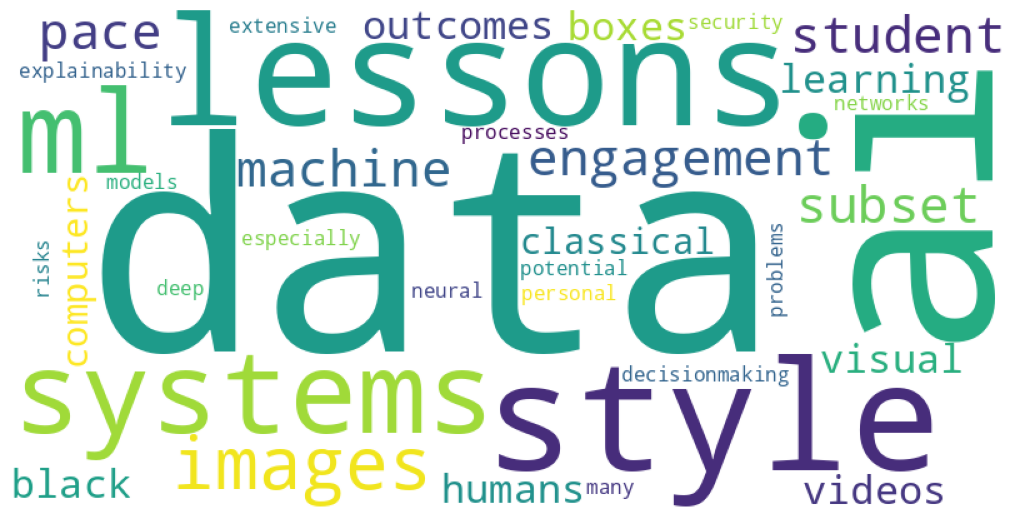

In [ ]:
# prompt: visualie word cloud for the keys generated

!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def visualize_wordcloud(keys):
    # Combine all keys into a single string
    all_keys = ' '.join([' '.join(sublist) for sublist in keys])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keys)

    # Display the generated image:
    plt.figure(figsize=(10, 5), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

visualize_wordcloud(generated_keys)


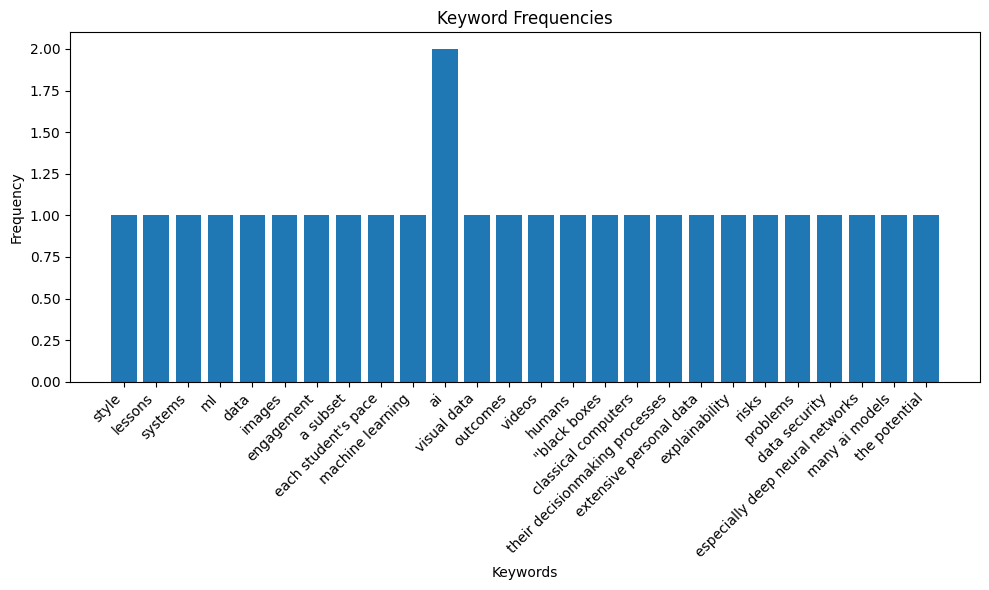

In [ ]:
# prompt: bar graph for keys

import matplotlib.pyplot as plt

# Assuming 'generated_keys' is a list of lists, where each inner list contains keywords.
# Example: generated_keys = [['key1', 'key2'], ['key3', 'key4', 'key1']]

# Count keyword frequencies
keyword_counts = {}
for key_list in generated_keys:
  for keyword in key_list:
    keyword_counts[keyword] = keyword_counts.get(keyword, 0) + 1

# Extract keywords and counts
keywords = list(keyword_counts.keys())
counts = list(keyword_counts.values())


plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(keywords, counts)
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.title("Keyword Frequencies")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
# question_model = T5ForConditionalGeneration.from_pretrained('t5-large')

In [ ]:
question_tokenizer = T5Tokenizer.from_pretrained('t5-large')
question_model = T5ForConditionalGeneration.from_pretrained('Parth/result')
device = 'cuda' if torch.cuda.is_available() else 'cpu'
question_models = question_model.to(device)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

In [ ]:
def get_question(context, answer, model, tokenizer):
    text = "context: {} answer: {}".format(context, answer)
    encoding = tokenizer.encode_plus(text, max_length=384, pad_to_max_length=False, truncation=True, return_tensors="pt").to(device)
    input_ids, attention_mask = encoding["input_ids"], encoding["attention_mask"]
    outs = model.generate(input_ids=input_ids,
                            attention_mask=attention_mask,
                            early_stopping=True,
                            num_beams=20,
                            num_return_sequences=1,
                            no_repeat_ngram_size=4,
                            max_length=100 )
    dec = [tokenizer.decode(ids, skip_special_tokens=True) for ids in outs]
    Question = dec[0].replace("question:", "")
    Question = Question.strip()
    return Question

def generate_questions(summaries, keywords, model, tokenizer):
    que_pair = []
    for i, summary in enumerate(summaries):
        keys = keywords[i]
        for answer in keys:
            try:  # Add a try-except block to handle potential errors
                ques = get_question(summary, answer, model, tokenizer)
                que_pair.append((ques, answer.capitalize()))
            except Exception as e:
                print(f"Error generating question for answer '{answer}': {e}")
                # You can choose to skip the problematic answer or handle it differently
                # For example, append a default question or an error message
                que_pair.append(("Error generating question", answer.capitalize()))
    return que_pair

questions = generate_questions(summaries, generated_keys, question_model, question_tokenizer)
for question, answer in questions:
    print("Question:", question)
    print("Answer:", answer)
    print("\n")


Question: Ai personalizes lessons to match each student's pace and learning what?
Answer: Style


Question: What does ai personalize to match each student's pace and learning style?
Answer: Lessons


Question: What can learn from data without being explicitly programmed?
Answer: Systems


Question: What is the name of machine learning?
Answer: Ml


Question: Machine learning enables systems to learn from what without being explicitly programmed?
Answer: Data


Question: 4 computer vision allows ai systems to interpret and analyze visual data — what is it?
Answer: Images


Question: What does ai personalize lessons to match each student's pace and learning style improve?
Answer: Engagement


Question: Is machine learning a subset of ai?
Answer: A subset


Question: Ai personalizes lessons to match what?
Answer: Each student's pace


Question: What is a subset of ai?
Answer: Machine learning


Question: What is machine learning a subset of?
Answer: Ai


Question: What does 4 computer vis

In [ ]:
# prompt: performace metric for list of  qstn & answer generated

def calculate_performance_metrics(questions):
    """
    Calculates performance metrics for a list of question-answer pairs.

    Args:
        questions: A list of tuples, where each tuple contains a question and its corresponding answer.

    Returns:
        A dictionary containing the performance metrics.
    """

    total_questions = len(questions)
    unmatched_count = 0
    matched_count = 0

    unmatched_answers = []
    matched_answers = []


    for question, answer in questions:
        if question == "Error generating question":
            unmatched_count += 1
            unmatched_answers.append(answer)
        else:
            matched_count += 1
            matched_answers.append(answer)

    metrics = {
        "total_questions": total_questions,
        "matched answers": matched_count,
        "unmatched  answers": unmatched_count,
        "match_rate": (matched_count / total_questions) * 100 if total_questions > 0 else 0,
        "unmatched_answers": unmatched_answers,  # Include unmatched answers in the metrics
        "matched_answers": matched_answers       # Include matched answers
    }

    return metrics

# Example usage (assuming 'questions' is your list of question-answer pairs)
performance_metrics = calculate_performance_metrics(questions)

# Print the performance metrics
for metric, value in performance_metrics.items():
    if metric == "unmatched_answers" or metric == "matched_answers":
        print(f"{metric}:")
        for item in value:
          print(item)
    else:
      print(f"{metric}: {value}")


total_questions: 27
matched answers: 27
unmatched  answers: 0
match_rate: 100.0
unmatched_answers:
matched_answers:
Style
Lessons
Systems
Ml
Data
Images
Engagement
A subset
Each student's pace
Machine learning
Ai
Visual data
Outcomes
Videos
Humans
"black boxes
Classical computers
Their decisionmaking processes
Extensive personal data
Explainability
Risks
Problems
Data security
Ai
Especially deep neural networks
Many ai models
The potential


In [ ]:
len(questions)

27

In [ ]:
for que,ans in questions:
  que_doc=nlp(que)
  que_key =[]
  for word in que_doc.noun_chunks:
    if word.text.lower() not in stop:
      que_key.append(word)
  print(que_key)


[Ai, lessons, each student's pace]
[each student's pace, style]
[data]
[the name, machine learning]
[Machine learning, systems]
[4 computer vision, systems, visual data]
[lessons, each student's pace, style]
[machine, a subset, ai]
[Ai, lessons]
[a subset, ai]
[machine, a subset]
[4 computer vision, ai systems]
[ai, lessons, each student's pace, style, engagement]
[4 computer vision, systems, visual data, images]
[Deep neural networks, "black boxes, their decision-making processes]
[Deep neural networks]
[Quantum computing, problems]
[deep neural networks, "black boxes]
[systems]
[Many ai models, especially deep neural networks, "black boxes, their decision-making processes, humans]
[Ai systems, extensive personal data, what to user privacy, data security]
[quantum computing, ai]
[ai systems, extensive personal data, risks, user privacy]
[Quantum computing, the potential]
[many ai models, "black boxes]
[deep neural networks, "black boxes]
[quantum computing, ai]


In [ ]:
# prompt: calculate overall uniquess score for generated questions by t5 model

def calculate_question_uniqueness(questions):
    """
    Calculates the uniqueness of generated questions.

    Args:
        questions: A list of tuples, where each tuple contains a question and its corresponding answer.

    Returns:
        A float representing the uniqueness score (percentage).
    """

    total_questions = len(questions)
    unique_questions = set()

    for question, _ in questions:
        if question != "Error generating question":  # Exclude error messages
          unique_questions.add(question)


    uniqueness_score = (len(unique_questions) / total_questions) * 100 if total_questions > 0 else 0
    return uniqueness_score

# Example usage:
uniqueness = calculate_question_uniqueness(questions)
print(f"Overall Question Uniqueness Score: {uniqueness:.2f}%")


Overall Question Uniqueness Score: 96.30%


In [ ]:
len(questions)

27

In [ ]:
# prompt: import meteor,bleu,rouge pip commands

!pip install meteor-score
!pip install sacrebleu
!pip install rouge-score


ERROR: Could not find a version that satisfies the requirement meteor-score (from versions: none)
ERROR: No matching distribution found for meteor-score
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=5e4ee4c2475b30857437e819407ea46e77cfb64fe12bdf19a3182facab0b315b
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [ ]:
# prompt: list me generated questions by t5  model
!pip install nltk
!pip install meteor-score # Install the meteor-score package

from rouge_score import rouge_scorer
from sacrebleu.metrics import BLEU, CHRF, TER
import nltk # import nltk to access meteor_score

# download wordnet, if not already downloaded
nltk.download('wordnet')
from nltk.translate.meteor_score import meteor_score


def calculate_question_quality(questions, reference_questions):
    """
    Calculates the quality of generated questions using various metrics.

    Args:
      questions: A list of generated questions.
      reference_questions: A list of reference questions (ground truth).

    Returns:
        A dictionary containing the calculated metrics.
    """

    if not questions or not reference_questions:
        return {"error": "Empty input lists."}  # Handle empty input lists

    if len(questions) != len(reference_questions):
        return {"error": "Input lists must have the same length."}

    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    bleu = BLEU()
    chrf = CHRF()
    ter = TER()

    rouge1_scores = []
    rougeL_scores = []
    bleu_scores = []
    chrf_scores = []
    ter_scores = []
    meteor_scores = []


    for generated_question, reference_question in zip(questions, reference_questions):

        # Handle cases where either the generated or reference question is an error message
        if generated_question == "Error generating question" or not reference_question:
            rouge1_scores.append(0)
            rougeL_scores.append(0)
            bleu_scores.append(0)
            chrf_scores.append(0)
            ter_scores.append(0)
            meteor_scores.append(0)
            continue

        scores = scorer.score(reference_question, generated_question)
        rouge1_scores.append(scores['rouge1'].fmeasure)
        rougeL_scores.append(scores['rougeL'].fmeasure)

        bleu_score = bleu.sentence_score(generated_question, [reference_question]).score
        bleu_scores.append(bleu_score)

        chrf_score = chrf.sentence_score(generated_question, [reference_question]).score
        chrf_scores.append(chrf_score)

        ter_score = ter.sentence_score(generated_question, [reference_question]).score
        ter_scores.append(ter_score)

        meteor_scores.append(meteor_score([generated_question], reference_question))

    metrics = {
        "rouge1": sum(rouge1_scores) / len(rouge1_scores) if rouge1_scores else 0,
        "rougeL": sum(rougeL_scores) / len(rougeL_scores) if rougeL_scores else 0,
        "bleu": sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0,
        "chrf": sum(chrf_scores) / len(chrf_scores) if chrf_scores else 0,
        "ter": sum(ter_scores) / len(ter_scores) if ter_scores else 0,
        "meteor": sum(meteor_scores) / len(meteor_scores) if meteor_scores else 0,
    }

    return metrics

# Example usage (replace with your actual generated and reference questions):

# Sample generated and reference questions (replace with your actual data)
generated_questions = [q for q,a in questions]
reference_questions = ["What is the role of artificial intelligence in education?",  # Example reference questions
                        "How can machine learning enhance teaching and learning?",
                        "What are the ethical considerations of AI in education?" ]


quality_metrics = calculate_question_quality(generated_questions, reference_questions)

for metric, value in quality_metrics.items():
    print(f"{metric}: {value}")


ERROR: Could not find a version that satisfies the requirement meteor-score (from versions: none)
ERROR: No matching distribution found for meteor-score
error: Input lists must have the same length.


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# prompt: list t5 generated question

for question, answer in questions:
    print("Question:", question)


Question: Ai personalizes lessons to match each student's pace and learning what?
Question: What does ai personalize to match each student's pace and learning style?
Question: What can learn from data without being explicitly programmed?
Question: What is the name of machine learning?
Question: Machine learning enables systems to learn from what without being explicitly programmed?
Question: 4 computer vision allows ai systems to interpret and analyze visual data — what is it?
Question: What does ai personalize lessons to match each student's pace and learning style improve?
Question: Is machine learning a subset of ai?
Question: Ai personalizes lessons to match what?
Question: What is a subset of ai?
Question: What is machine learning a subset of?
Question: What does 4 computer vision allow ai systems to interpret and analyze?
Question: ai personalizes lessons to match each student's pace and learning style, improving engagement and what?
Question: 4 computer vision allows ai systems 

In [ ]:
# prompt: vocabulary richness of qquestions

def calculate_vocabulary_richness(text):
    """Calculates the vocabulary richness of a given text.

    Args:
        text: The input text as a string.

    Returns:
        A float representing the type-token ratio (TTR), a measure of vocabulary richness.
    """

    words = word_tokenize(text.lower())
    unique_words = set(words)

    if not words:
        return 0  # Handle empty text input

    ttr = len(unique_words) / len(words)
    return ttr


# Example usage (assuming 'text' is defined in your code)
# Replace the following with your actual text:
text = "This is a sample text to calculate vocabulary richness."
vocabulary_richness = calculate_vocabulary_richness(text)
print(f"The vocabulary richness (TTR) of the text is: {vocabulary_richness:.4f}")

# Calculate vocabulary richness for all questions
for question, answer in questions:
    if question != "Error generating question":  # Exclude error messages
        ttr = calculate_vocabulary_richness(question)
        print(f"Question: {question}")
        print(f"Vocabulary Richness (TTR): {ttr:.4f}")
        print("-" * 20)


The vocabulary richness (TTR) of the text is: 1.0000
Question: Ai personalizes lessons to match each student's pace and learning what?
Vocabulary Richness (TTR): 1.0000
--------------------
Question: What does ai personalize to match each student's pace and learning style?
Vocabulary Richness (TTR): 1.0000
--------------------
Question: What can learn from data without being explicitly programmed?
Vocabulary Richness (TTR): 1.0000
--------------------
Question: What is the name of machine learning?
Vocabulary Richness (TTR): 1.0000
--------------------
Question: Machine learning enables systems to learn from what without being explicitly programmed?
Vocabulary Richness (TTR): 1.0000
--------------------
Question: 4 computer vision allows ai systems to interpret and analyze visual data — what is it?
Vocabulary Richness (TTR): 1.0000
--------------------
Question: What does ai personalize lessons to match each student's pace and learning style improve?
Vocabulary Richness (TTR): 1.0000
-

In [ ]:
# stores these qustion and answer

import json

def store_qa_pairs(questions, filename="qa_pairs.json"):
    """Stores question-answer pairs in a JSON file.

    Args:
        questions: A list of tuples, where each tuple contains a question and its corresponding answer.
        filename: The name of the JSON file to store the data.
    """
    qa_data = []
    for question, answer in questions:
        qa_data.append({"question": question, "answer": answer})

    with open(filename, 'w') as f:
        json.dump(qa_data, f, indent=4)

# Example usage:
# Assuming 'questions' is your list of question-answer pairs from the previous code.
store_qa_pairs(questions)


In [ ]:
# overall richness

def calculate_overall_richness(generated_keys, questions):
    """Calculates overall richness based on keyword uniqueness and question vocabulary richness.

    Args:
        generated_keys: A list of lists of keywords.
        questions: A list of tuples, where each tuple contains a question and its corresponding answer.

    Returns:
        A dictionary containing the overall richness scores.
    """

    # Keyword Uniqueness
    total_keys = 0
    unique_keys = set()
    for key_list in generated_keys:
        total_keys += len(key_list)
        unique_keys.update(key_list)
    keyword_uniqueness = (len(unique_keys) / total_keys) * 100 if total_keys > 0 else 0

    # Question Vocabulary Richness
    question_ttrs = []
    for question, _ in questions:
        if question != "Error generating question":
            ttr = calculate_vocabulary_richness(question)
            question_ttrs.append(ttr)
    avg_question_richness = sum(question_ttrs) / len(question_ttrs) if question_ttrs else 0

    # Overall Richness (weighted average)
    overall_richness = 0.6 * keyword_uniqueness + 0.4 * avg_question_richness

    return {
        "keyword_uniqueness": keyword_uniqueness,
        "avg_question_richness": avg_question_richness,
        "overall_richness": overall_richness,
    }

# Example usage:
richness_metrics = calculate_overall_richness(generated_keys, questions)
richness_metrics


{'keyword_uniqueness': 96.29629629629629,
 'avg_question_richness': 0.9921605869318287,
 'overall_richness': 58.1746420125505}

In [ ]:

def remove_low_richness_questions(questions, threshold=0.9):
  """Removes questions with vocabulary richness (TTR) below a given threshold.

  Args:
      questions: A list of tuples, where each tuple contains a question and its corresponding answer.
      threshold: The minimum TTR score for a question to be considered rich.

  Returns:
      A new list of questions that meet the richness criterion.
  """

  filtered_questions = []
  for question, answer in questions:
    if question != "Error generating question":  # Exclude error messages
        ttr = calculate_vocabulary_richness(question)
        if ttr >= threshold:
            filtered_questions.append((question, answer))
  return filtered_questions

# Example usage:
filtered_questions = remove_low_richness_questions(questions, threshold=0.99)

for question, answer in filtered_questions:
    print("Question:", question)
    print("Answer:", answer)
    print("\n")


Question: Ai personalizes lessons to match each student's pace and learning what?
Answer: Style


Question: What does ai personalize to match each student's pace and learning style?
Answer: Lessons


Question: What can learn from data without being explicitly programmed?
Answer: Systems


Question: What is the name of machine learning?
Answer: Ml


Question: Machine learning enables systems to learn from what without being explicitly programmed?
Answer: Data


Question: 4 computer vision allows ai systems to interpret and analyze visual data — what is it?
Answer: Images


Question: What does ai personalize lessons to match each student's pace and learning style improve?
Answer: Engagement


Question: Is machine learning a subset of ai?
Answer: A subset


Question: Ai personalizes lessons to match what?
Answer: Each student's pace


Question: What is a subset of ai?
Answer: Machine learning


Question: What is machine learning a subset of?
Answer: Ai


Question: What does 4 computer vis

In [ ]:
# prompt: count filtered_questions

print(len(filtered_questions))


23


In [ ]:

import random

# Assuming 'filtered_questions' is your list of (question, answer) tuples.
random.shuffle(filtered_questions)  # Shuffle the list randomly

split_index = len(filtered_questions) // 2
ref_questions = filtered_questions[:split_index]
eval_questions = filtered_questions[split_index:]

print("Reference Questions:")
for question, answer in ref_questions:
    print("Question:", question)
    print("Answer:", answer)
    print("\n")

print("Evaluation Questions:")
for question, answer in eval_questions:
    print("Question:", question)
    print("Answer:", answer)
    print("\n")


Reference Questions:
Question: Why do many ai models function as "black boxes"?
Answer: Especially deep neural networks


Question: Deep neural networks function as what?
Answer: "black boxes


Question: What does ai personalize to match each student's pace and learning style?
Answer: Lessons


Question: What does ai personalize lessons to match each student's pace and learning style improve?
Answer: Engagement


Question: Quantum computing solves problems that are infeasible for what?
Answer: Classical computers


Question: What is machine learning a subset of?
Answer: Ai


Question: What is a subset of ai?
Answer: Machine learning


Question: Is machine learning a subset of ai?
Answer: A subset


Question: ai systems often require extensive personal data, posing risks to user privacy and what?
Answer: Data security


Question: Why do deep neural networks function as "black boxes"?
Answer: Their decisionmaking processes


Question: How can quantum computing revolutionize ai?
Answer: P

In [ ]:
import random
from sacrebleu import corpus_bleu

# Assuming 'filtered_questions' is a list of (question, answer) tuples.
random.shuffle(filtered_questions)  # Shuffle the list

# Ensure an even split
split_index = len(filtered_questions) // 2
ref_questions = filtered_questions[:split_index]
eval_questions = filtered_questions[split_index:]

# Extract questions for BLEU evaluation
reference_questions = [[q] for q, a in ref_questions]  # List of lists (for multiple references)
candidate_questions = [q for q, a in eval_questions]

# Compute BLEU score
bleu_score = corpus_bleu(candidate_questions, reference_questions).score

print(f"BLEU score: {bleu_score}")


BLEU score: 70.71067811865478
